
# Project: Investigate the No-show appointments Dataset in Brazil
### by: Ting Yang

## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
    <ul>
     <li> <a href="#questions"> 1.1 Questions we would like to answer</a></li>
    </ul> 
<li><a href="#wrangling">2. Data Wrangling</a></li>
    <ul>
  <li><a href="#acquisition">2.1 Data Acquisition</a></li>  
     </ul>
    <ul>
  <li><a href="#cleaning">2.2 Data Cleaning</a></li>  
     </ul>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4. Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

In this project, we will investigate a dataset and then communicate the findings about it. The dataset here under investigation shows the information that collected from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. Below are some of the variables that collected about the patient. Information about patients' health conditions also recorded in the dataset such as Hypertension, Alcoholism, and Diabetes.

- <b>ScheduledDay</b> - the day the patient set up their appointment.

- <b>Neighborhood</b> - the location of the hospital.

- <b>Scholarship</b> - whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

- <b>No-show</b> indicates whether the patient turned up for their scheduled appointment. ‘No’ means patient showed up to their appointment, and ‘Yes’ means they did not show up.


<a id='questions'></a>
### 1.1 Questions we would like to answer
 - What is the overall no-show rate?

 - Who is least likely to attend? Based on the variables recorded, what is the most relevant factor that influences the patient to no showing their appointment?


<a id='wrangling'></a>
## 2. Data Wrangling

In this section, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.
We will also describe the method used here and any problem encountered. Dataset will be loaded into Python and analysis will be performed in Jupyter Notebook.

<a id='acquisition'></a>
### 2.1 Data acquisition
We first check if the dataset fits for purpose by inspecting the data stucture, data format, quantity and other features. This will be achieved by following steps.

> #### Step 1: Load the libraries.

In [78]:
#import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> #### Step 2: Load the data and print out a few lines. 

In [79]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<b>Observations</b> : 

- Variables <b>ScheduledDay</b> and <b>AppointmentDay</b> have time stamp after the date, it's probably better to remove them to make the data easy to read and work with.
- Also column name <b>Hipertension</b> is mispelled, this needs to be corrected.
- Column name <b>No-show</b> will be updated with underscore rather than hyphen.
- <b>No-show</b> will be recoded to 1s and 0s for easy analysis, like other variables.

> #### Step 3: Check the general properties of datase. Perform operations to inspect data types and look for instances of missing or possibly errant data.


In [80]:
df.shape

(110527, 14)

In [81]:
#check if there are any duplicates
df.duplicated()
print(sum(df.duplicated()))


0


In [82]:
#check if there are duplicated PatientIDs
df[df.duplicated(['PatientId'], keep=False)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [83]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<b>Observations</b>: 

- No missing data as there are 110527 entries for all the variables, however it is noticed that there is age recorded as negative values, such cases will be treated as newborn babies, similarly for age 0 if any.

- <b>PatientId</b> is in scientific notation, however it is inrelevant to our analysis.


<a id='cleaning'></a>
### 2.2 Data Cleaning

After inspecting the structure of the data and the problems that need to be cleaned, we will perform those cleaning steps in this part before analyzing the data.
First rename the column names.


In [85]:
df=df.rename(columns={'PatientId':'PatientID','Hipertension':'Hypertension','No-show':'No_show'})
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Now remove the timestamp from the two date variables.

In [86]:
df['ScheduledDay']=pd.DatetimeIndex(df['ScheduledDay']).date
df['AppointmentDay']=pd.DatetimeIndex(df['AppointmentDay']).date
df.head()


,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Recode <b>No_show</b> to 1's and 0's; 1=not showed up to appointment, 0= showed up to appointment.

In [87]:
#define a function to recode all the Yes/No to 1/0.
def recode(dataset,column):      
    df[column].replace('No', 0,inplace=True)
    df[column].replace('Yes', 1,inplace=True)
    return df

In [88]:
recode(df,'No_show')
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


Check the negative age cases.

In [89]:
NegativeAge = df.index[df['Age'] < 0]
NegativeAge

Int64Index([99832], dtype='int64')

There are 1 entry with negative age. We can drop it from the dataset as we have over 110k entries in our dataset, this one wrong entry of data is not going to impact the analysis.

In [90]:
#drop row with negative Age
df.drop(df[df.Age < 0].index, inplace=True)

In [91]:
#check if the final data looks okay
df.describe()

,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


<a id='eda'></a>
## 3. Exploratory Data Analysis
In this section, we will analyze the data, look at one variable at a time and then follow it up by looking at relationships between variables. We will finally answer the quesitons we posed in the introduction section.

First we will look at the overall no-show rate.

### Q1: What is the no-show rate?

In [92]:
no_show = df["No_show"].value_counts()
print(no_show)
rate_no_show = no_show[1]/ no_show.sum() * 100
print(rate_no_show )


0    88207
1    22319
Name: No_show, dtype: int64
20.193438647919944


In [93]:
#check the no-show rate
df.No_show.mean()

0.20193438647919945

The overall crude rate of people who did not show up to their scheduled appointment is 20.2%.

### Q2: Who is least likely to attend the appointment?

For this research question, we will look at the features recorded in the dataset and investigate if these factors are associated with the no-show rate. First we look at if gender influences the no-show rate.

In [94]:
#to calculate the means of men and women who missed their appointments
df.groupby('Gender')['No_show'].mean()

Gender
F    0.203149
M    0.199679
Name: No_show, dtype: float64

The rate of no-show for both males and females are very similar.

In [95]:
#create Male and Female subsets
total_gender = df['Gender'].value_counts()
male = df.query('Gender == "M"')
female = df.query('Gender == "F"')
total_gender

F    71839
M    38687
Name: Gender, dtype: int64

In [96]:
#define a function which calculates the proportion of male and female in the total patient population
def compute_percentage(x,y):
    percentage=x.count().max()/y.sum()*100
    return percentage

In [97]:
perc_male=compute_percentage(male,total_gender)
perc_female=compute_percentage(female,total_gender)

print(perc_male, perc_female)

35.00262381702043 64.99737618297956


Despite 65% of the patient population is female, the rate of both female and male who did not turn up to their sheduled appointment is almost identical (20%). This means gender is not likely to affect the appointment show-up rate.

In [98]:
#create Showup and noShowup subsets, i.e. all the rows that people showed up to their appointment and not showed.
Showup = df.No_show == False
noShowup = df.No_show == True

In [99]:
#calculate the mean age of the no-show population
df.Age[noShowup].mean()

34.31766656212196

In [100]:
#calculate the mean age of the showup population
df.Age[Showup].mean()

37.790504154999034

It looks like the mean age of people who showed up to their appointment is not significantly different to those people who did not show up to appointment. This can also be seen from the below histogram which shows the distribution for both shown population and no-show population are almost identical.

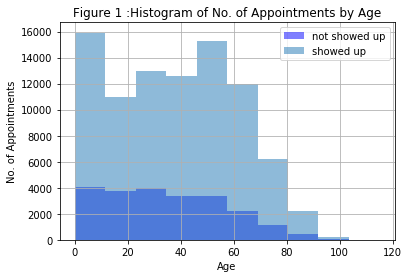

In [101]:
df.Age[noShowup].hist(alpha=0.5,color='blue',label='not showed up')
df.Age[Showup].hist(alpha=0.5,label='showed up')
plt.ylabel('No. of Appointments')
plt.xlabel('Age')
plt.title("Figure 1 :Histogram of No. of Appointments by Age")
plt.legend();

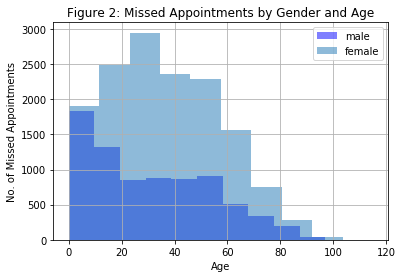

In [102]:
male.query('No_show == 1').Age.hist(alpha=0.5, color='blue', label='male')
female.query('No_show == 1').Age.hist(alpha=0.5, label='female')
plt.ylabel('No. of Missed Appointments')
plt.xlabel('Age')
plt.title("Figure 2: Missed Appointments by Gender and Age")
plt.legend();

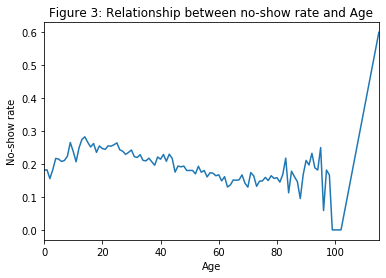

In [104]:
df.groupby('Age').No_show.mean().plot(kind='line');
plt.title("Figure 3: Relationship between no-show rate and Age");
plt.ylabel('No-show rate')
plt.xlabel('Age');

It is observed that the No. of missed appointments started to decrease from age 60 in the histgram. In the line chart plotted above, the rate of no-show is in a decreasing trend in general as the age increases, this maybe due to older people tend to be retired and have capacity and time to make their appointments. Also it is noticed that patients at younder age tend to miss their appointments more.

So far we have been working on the relationship between the no-show rate and <b>Age</b>, now we will conduct a linear regression between them, i.e. Age is our independent variable and no-show rate is the dependent variable. 

In [105]:
#first transform the dataset into the format which only includes the variables we want
df2 = pd.crosstab(index = df['Age'], columns = df['No_show']).reset_index()
df2.head(5)

No_show,Age,0,1
0,0,2900,639
1,1,1858,415
2,2,1366,252
3,3,1236,277
4,4,1017,282


In [106]:
#now calculate the no-show rate in relation to Age
df2['noShow'] = df2[1]/(df2[1] + df2[0])
df2['noShow']

0      0.180559
1      0.182578
2      0.155748
3      0.183080
4      0.217090
         ...   
98     0.166667
99     0.000000
100    0.000000
101    0.000000
102    0.600000
Name: noShow, Length: 103, dtype: float64

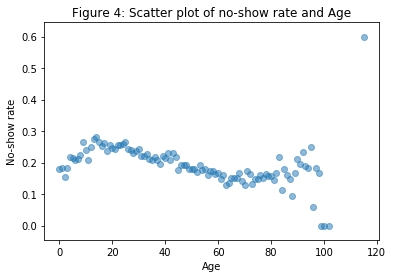

In [107]:
plt.scatter(x=df2['Age'] , y=df2['noShow'] , alpha=0.5)
plt.title('Figure 4: Scatter plot of no-show rate and Age')
plt.ylabel('No-show rate')
plt.xlabel('Age');

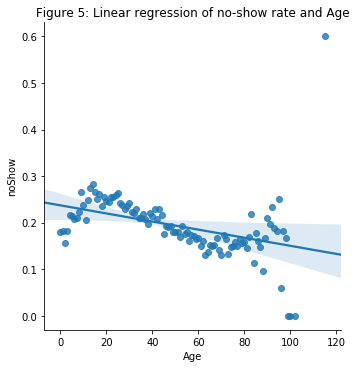

In [108]:
#now fit a regression line
sns.lmplot(x="Age", y="noShow", data=df2,legend=True)
plt.title("Figure 5: Linear regression of no-show rate and Age");

In [109]:
from scipy import stats
r = stats.linregress(df2['noShow'],df2['Age'])
r.rvalue

-0.39074312265315225

The liner regression plot indicates a negative correlation between the no-show rate and Age, which means as the age increases, the no-show rate decreases. This is also proved by the line chart (Figure 2). The r-value is -0.39 which suggests a morderate negative relationship, however it can be seen that ages from 0 to 16 years have a higher no-show rate, this could be due to patients in that ages group are highly rely on their parents/carers to take them to hospital.

Now we look at if the underlying conditions like Hypertension, Diabetes and Alcoholism will make a difference in whether people showed up to their appointments or not.

In [110]:
conditions = ['Hypertension','Alcoholism','Diabetes']
for c in conditions :
    print(df.groupby(c)['No_show'].mean())

Hypertension
0    0.209039
1    0.173020
Name: No_show, dtype: float64
Alcoholism
0    0.201948
1    0.201488
Name: No_show, dtype: float64
Diabetes
0    0.203630
1    0.180033
Name: No_show, dtype: float64


From the mean values calculated above, it looks like people who have conditions like Hypertension, Diabetes or Alcoholism are not significantly different to those who do not have those regards to attending their hospital appointment, howvever they do have a slightely lower no-show rate.

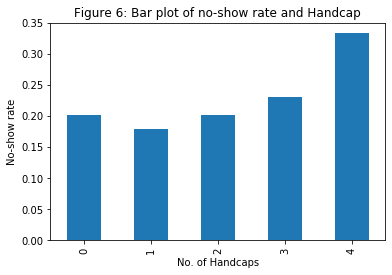

In [113]:
#check the mean of no-show by Handcaps
df.groupby('Handcap').No_show.mean().plot(kind='bar');
plt.title('Figure 6: Bar plot of no-show rate and Handcap')
plt.ylabel('No-show rate')
plt.xlabel('No. of Handcaps');

Clearly people with more Handcaps are more likely not to show up to their appointment, especially with 2 or more handcaps.

In [33]:
#check the means of no-show by receiving SMS
df.groupby('SMS_received').No_show.mean()

SMS_received
0    0.167035
1    0.275745
Name: No_show, dtype: float64

It looks like by sending SMS reminder does not help people show up to their appointment, quite suprising!

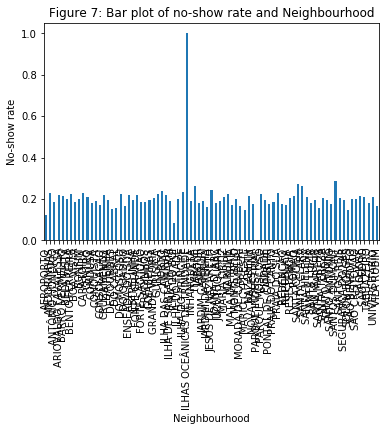

In [114]:
neighbour = df.groupby('Neighbourhood').No_show.mean()
neighbour.plot(kind='bar');
plt.title('Figure 7: Bar plot of no-show rate and Neighbourhood')
plt.ylabel('No-show rate')
plt.xlabel('Neighbourhood');

In [115]:
neighbour.describe()

count    81.000000
mean      0.205428
std       0.097230
min       0.000000
25%       0.179907
50%       0.197588
75%       0.217454
max       1.000000
Name: No_show, dtype: float64

The x-axis is very difficult to read, however we can see that the no-show rate looks fairly consistent across all the hospitals with a mean rate of 20% apart from hospital "Ilhas Oceanicas De Trindade" which has 100% no-show rate. We double check it by looking at the actual numbers.

In [116]:
sort_neighbour = neighbour.sort_values(ascending=False)
sort_neighbour.head()

Neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    1.000000
SANTOS DUMONT                  0.289185
SANTA CECÍLIA                  0.274554
SANTA CLARA                    0.264822
ITARARÉ                        0.262664
Name: No_show, dtype: float64

In [117]:
sort_neighbour.describe()

count    81.000000
mean      0.205428
std       0.097230
min       0.000000
25%       0.179907
50%       0.197588
75%       0.217454
max       1.000000
Name: No_show, dtype: float64

In [118]:
# investigate ILHAS OCEÂNICAS DE TRINDADE data
allmiss_Hosp = df.loc[df['Neighbourhood'] == 'ILHAS OCEÂNICAS DE TRINDADE']
allmiss_Hosp

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
48754,5.349869e+11,5583947,F,2016-04-14,2016-05-13,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1
48765,7.256430e+12,5583948,F,2016-04-14,2016-05-13,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1


Very little data from this hospital, therefore the no-show rate is not representative. We can not make assumption that ILHAS OCEÂNICAS DE TRINDADE hospital has higher no-show rate than other hospitals.

<a id='conclusions'></a>
## 4. Conclusions

From the exploratory analysis we have done, we find the following insights in relation to the no-show rate to the scheduled appointment in Brazil:

- The overall crude no-show rate to a scheduled appointment is 20.2%.


- Based on the variables recorded against each patient

  - Gender is not significant as the no-show rate of female and male is almost the same (20%); however it is noticed that the amount of female patients is almost doubled than the male patients;
  
  - The no-show rate decreases as the patient age increases. This could be due to older people tend to be retired and they have more time and capacity to attend the appointment compare to younger people.
  
  - The no-show rate of underlying conditions like Hypertention, Alcoholism and Diabetes are not very significant compare to those who do not have, however patients with those conditions have slightly lower no-show rate. This could be due to they have regular appointments booked because of their health conditions, it requires further analysis to make an evidence based conclusion.
   
  - We have found that suprisingly sending a SMS reminder does not help people show up to the appointment;
  
  - Among all the hospitals in the dataset, the no-show rate is quite consistent except hospital ILHAS OCEÂNICAS DE TRINDADE. However analysis shows that very little data recorded for that hospital, therefore it can be discarded as an outlier.


### Limitations
During our analysis, we have some limitations:
- The hospital location variable lacks some information as it does not give us any meaningful information other than the hospital name. Information about patients home distance to the scheduled hospital could be recorded, then this would allow us to analyze if distance is a factor to impact the no-show rate;


- We have noticed that time is recorded for the Scheduled Day but not the appointment day (although <b>AppointmentDay</b> is recorded with timestamp, it is all 00's). Time of the appointment day could be recorded as this could be a factor that affects the no-show rate, too early or too late of the appointment could be a possibility of patients not attend the appointment.


- Patients with age over 100 years old could skew our data, these patients maybe removed from the analysis.

### Further Analysis

In order for us to better analyze the data and investigate how we can reduce the no-show rate, further information suggested in the limitation section could be started to record, also reasons for no-show could also be recorded as this can help us understand if it's patient factor or hospital factor that results patient not show up to the appointment. Once we have had more information, analysis like multiple liner regression could be performed to investigate whether these factors can be used to predict the probability of patients showing up to their appointment. Once we have identified the main causes for no-show, suggestions could be made to improve no-show rate.

#### References
<ul>
    <li> <a> https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html</a></li> 
    <li> <a> https://seaborn.pydata.org/generated/seaborn.regplot.html</a></li> 
    <li> <a> https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas</a></li> 
</ul> 